# 日経平均株価

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import yfinance as yf

## 日経平均株価の yf.Ticker インスタンスの作成

In [3]:
symbol = '^N225'
ticker = yf.Ticker(symbol)

## 過去10年の月足データ

In [4]:
df = ticker.history(period='10y', interval='1mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-01 00:00:00+09:00,15454.589844,16374.139648,15440.990234,16173.519531,2530100000,0.0,0.0
2014-10-01 00:00:00+09:00,16173.389648,16533.910156,14529.030273,16413.759766,3436700000,0.0,0.0
2014-11-01 00:00:00+09:00,16732.849609,17520.539062,16713.369141,17459.849609,3155400000,0.0,0.0
2014-12-01 00:00:00+09:00,17475.099609,18030.830078,16672.939453,17450.769531,2962900000,0.0,0.0
2015-01-01 00:00:00+09:00,17325.679688,17850.589844,16592.570312,17674.390625,2691500000,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-01 00:00:00+09:00,40646.699219,40697.218750,36733.058594,38405.660156,2522300000,0.0,0.0
2024-05-01 00:00:00+09:00,38107.378906,39437.160156,37617.000000,38487.898438,2632400000,0.0,0.0
2024-06-01 00:00:00+09:00,38734.949219,39788.628906,37950.199219,39583.078125,2209000000,0.0,0.0


### 2020年３月の日経平均株価

月次終値としては2017年３月（１万8909円26銭）以来、３年ぶりの水準に落ち込んだ。新型コロナウイルスの感染者が世界的に増え続け、終息の兆しが見えないなか、実体経済への影響を警戒した売りが広がった。原油安や急速な円高・ドル安を受け、運用リスクを回避する株売りも目立った。

Reference: https://indexes.nikkei.co.jp/atoz/2020/04/202003.html

In [5]:
origin = pd.to_datetime('2018-01-01 00:00:00+09:00')
price_min = min(df[df.index > origin]['Low'])
df_min = df[df['Low'] == price_min]
ts_min = df_min.index[0]
print(ts_min, price_min)

2020-03-01 00:00:00+09:00 16358.1904296875


### 2024年7月の日経平均株価

７月前半は米連邦準備理事会（ＦＲＢ）の早期利下げへの期待を背景に、米国市場でハイテク株が上昇。東京市場でも半導体関連株が買われて日経平均が上昇し、11日には４万2224円02銭と終値で史上初めて４万2000円台を記録した。

Reference: https://indexes.nikkei.co.jp/atoz/2024/08/20247.html

In [6]:
price_max = max(df['High'])
df_max = df[df['High'] == price_max]
ts_max = df_max.index[0]
print(ts_max, price_max)

2024-07-01 00:00:00+09:00 42426.76953125


In [7]:
delta = price_max - price_min
level1 = price_max - 0.236 * delta
level2 = price_max - 0.382 * delta
level3 = price_max - 0.618 * delta

## フィボナッチリトレースメント

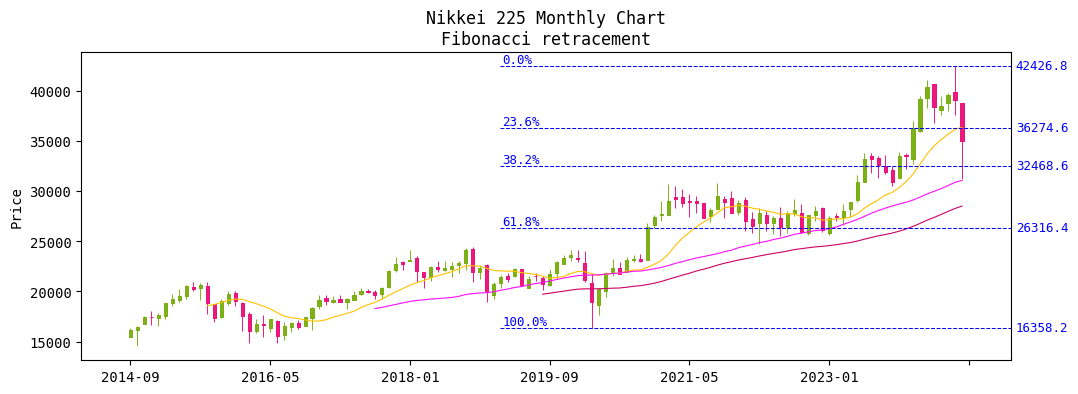

In [11]:
plt.rcParams['font.family'] = 'monospace'
fig, ax = plt.subplots(figsize=(12, 4))

mpf.plot(
    df,
    type='candle',
    style='binance',
    datetime_format='%Y-%m',
    xrotation=0,
    mav=(12, 36, 60),
    ax = ax,
)

# フィボナッチリトレースメント
x_start = 0.45
x_left = ax.get_xlim()[0]
x_right = ax.get_xlim()[1]
x_mid = (x_right - x_left) * (x_start - 0.05)
x_delta = x_right - x_left
x_adjust = x_delta * 0.005

y_min = ax.get_ylim()[0]
y_max = ax.get_ylim()[1]
y_delta = y_max - y_min
y_adjust = y_delta * 0.01

for y, v in zip([price_max, level1, level2, level3, price_min],[0, 23.6, 38.2, 61.8, 100]):
    plt.axhline(y, xmin=x_start, linestyle = 'dashed', linewidth=0.75, color = 'b')
    plt.text(x_right + x_adjust, y - y_adjust, '%.1f' % y, color='b', fontsize=9)
    plt.text(x_mid, y + y_adjust, '%.1f%%' % v, color='b', fontsize=9)

plt.title('Nikkei 225 Monthly Chart\nFibonacci retracement')
plt.savefig('n255_fibonacci.png')
plt.show()